### Dependências

In [2]:
!pip install opencv-python numpy matplotlib pillow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import requests
import numpy as np

### Função

A imagem de entrada será redimensionada para um tamanho padrão que, nesse caso, é 450x250 pixels, para que o algoritmo tenha maior consistência na detecção. Na situação proposta, a cor do carro não é relavante. Logo, converter a imagem para escala de cinza simplificará o trabalho do programa.

Alguns filtros podem auxiliar na obtenção de resultados satisfatórios. Aqui, foram aplicados o filtro gaussiano e suavização com uma operação de dilatação. O primeiro tem como objetivo reduzir o ruído presente na imagem e suavizar os detalhes. Já o segundo, por sua vez, engrossa as bordas dos objetos presentes na imagem, ajudando a conectar regiões adjacentes e tornar a detecção dos objetos mais robusta.

Após a aplicação dos filtros, é criado um kernel elíptico que será utilizado na operação de fechamento. Esta operação morfológica preenche lacunas e pequenos buracos nos objetos, ajudando a obter formas mais completas e bem definidas dos carros detectados.

Em seguida, é carregado um classificador em cascata previamente treinado para detectar carros. Esse classificador é uma representação do modelo treinado para reconhecer padrões específicos de carros. Ele é aplicado à imagem resultante do fechamento para identificar regiões onde carros estão presentes, percorrendo a imagem em diferentes escalas e tamanhos, buscando por características de carros.

Uma vez que as regiões com carros são identificadas, retângulos delimitadores são desenhados ao redor dessas regiões na imagem original, destacando esses objetos.
Por fim, é calculado o número total de carros detectados e, junto da imagem com os retângulos delimitadores desenhados, é retornada como resultado do algoritmo.

In [6]:
def detect_cars(image):
    image = Image.open(image)
    image = image.resize((450,250))
    image_arr = np.array(image)
    grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
    Image.fromarray(grey)
    blur = cv2.GaussianBlur(grey,(5,5),0)
    Image.fromarray(blur)
    dilated = cv2.dilate(blur,np.ones((3,3)))
    Image.fromarray(dilated)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
    Image.fromarray(closing)
    car_cascade_src = 'car.xml'
    car_cascade = cv2.CascadeClassifier(car_cascade_src)
    cars = car_cascade.detectMultiScale(closing, 1.1, 1)
    cnt = 0
    for (x,y,w,h) in cars:
        cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
        cnt += 1
    return {
        'total': cnt, 
        'img': Image.fromarray(image_arr)
    }


### Testes

As imagens escolhidas para os testes podem ser obtidas nos links disponíveis nas células de código

I found 7 cars


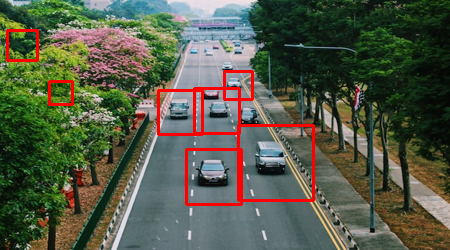

In [7]:
res = detect_cars(requests.get('https://unsplash.com/photos/krK4QkUoOPU/download?ixid=M3wxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjg2NDA4NDA5fA&force=true&w=640', stream=True).raw)
print(f"I found {res['total']} cars")
res['img']

I found 4 cars


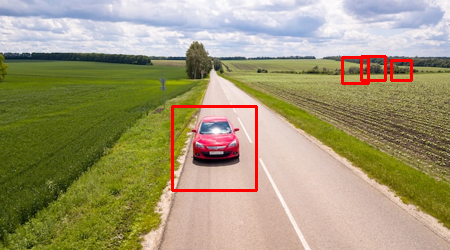

In [8]:
res = detect_cars(requests.get('https://unsplash.com/photos/8czDAmtXdfs/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8M3x8Y2FyJTIwb24lMjB0aGUlMjByb2FkfHB0fDB8fHx8MTY4NjQwNTA5N3ww&force=true&w=640', stream=True).raw)
print(f"I found {res['total']} cars")
res['img']

I found 22 cars


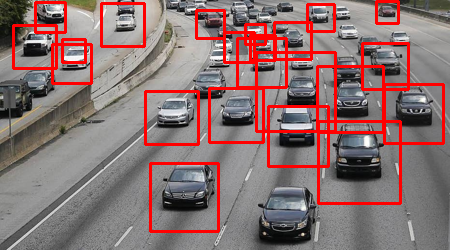

In [9]:
res = detect_cars(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
print(f"I found {res['total']} cars")
res['img']